# Configure environment


In [48]:
!nvidia-smi

Wed Nov 11 02:41:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 455.32.00    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P2000        On   | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P0    N/A /  N/A |    607MiB /  4031MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [49]:
!nvidia-settings -q CUDACores -t

768
768


In [ ]:
nvidia-settings -q CUDACores -t


In [4]:
!lscpu

Architektur:                     x86_64
CPU Operationsmodus:             32-bit, 64-bit
Byte-Reihenfolge:                Little Endian
Adressgrößen:                    39 bits physical, 48 bits virtual
CPU(s):                          12
Liste der Online-CPU(s):         0-11
Thread(s) pro Kern:              2
Kern(e) pro Socket:              6
Sockel:                          1
NUMA-Knoten:                     1
Anbieterkennung:                 GenuineIntel
Prozessorfamilie:                6
Modell:                          158
Modellname:                      Intel(R) Core(TM) i7-8850H CPU @ 2.60GHz
Stepping:                        10
CPU MHz:                         4100.817
Maximale Taktfrequenz der CPU:   4300,0000
Minimale Taktfrequenz der CPU:   800,0000
BogoMIPS:                        5199.98
Virtualisierung:                 VT-x
L1d Cache:                       192 KiB
L1i Cache:                       192 KiB
L2 Cache:                        1,5 MiB
L3 Cache:                  

In [1]:
import os
import numpy as np
import pandas as pd

In [ ]:
running_type = 'C'
threads = 6

types = [{'name': 'S', 'max': 1, 'partitions': 1}, {'name': 'O', 'max': 24, 'partitions': 16}, {'name': 'C', 'max': 128 * 4, 'partitions': 20}]

for t in types:
    for threads in np.linspace(1, t['max'], t['partitions']):
        os.system("./bin/violajones {} {}".format(t['name'], int(threads)))

In [2]:
!cat output.csv

S, 18.591916,18.5919,1,-1,128,6
O, 19.16038,19.016,1,-1,128,6
O, 12.180911,12.1809,2,-1,128,6
O, 9.420914,9.42092,4,-1,128,6
O, 8.700521,8.70053,5,-1,128,6
O, 10.735772,10.7358,7,-1,128,6
O, 9.423043,9.42305,8,-1,128,6
O, 8.702704,8.70271,10,-1,128,6
O, 8.60133,8.06014,11,-1,128,6
O, 7.300676,7.30068,13,-1,128,6
O, 7.119487,7.11949,14,-1,128,6
O, 7.480152,7.48016,16,-1,128,6
O, 7.80332,7.08034,17,-1,128,6
O, 7.195924,7.19593,19,-1,128,6
O, 7.40119,7.04012,20,-1,128,6
O, 6.952102,6.95211,22,-1,128,6
O, 6.837187,6.83719,24,-1,128,6
C, 114.159031,114.159,1,63961,128,6
C, 112.557512,112.558,27,2369,128,6
C, 113.860378,113.86,54,1185,128,6
C, 119.803321,119.803,81,790,128,6


In [13]:
import pandas as pd
df = pd.read_csv("output.csv", names=('Type', "Time 1", "Time 2", "Threads", "Blocks", "Cores", "MPs"))
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs
0,S,18.591916,18.59190,1,-1,128,6
1,O,19.160380,19.01600,1,-1,128,6
2,O,12.180911,12.18090,2,-1,128,6
3,O,9.420914,9.42092,4,-1,128,6
4,O,8.700521,8.70053,5,-1,128,6
5,O,10.735772,10.73580,7,-1,128,6
6,O,9.423043,9.42305,8,-1,128,6
7,O,8.702704,8.70271,10,-1,128,6
8,O,8.601330,8.06014,11,-1,128,6
9,O,7.300676,7.30068,13,-1,128,6


In [33]:
df["Time"] = df[["Time 1", "Time 2"]].mean(axis = 1)
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs,Speedup 1,Speedup 2,Time
0,S,18.591916,18.59190,1,-1,128,6,1,1,18.591908
1,O,19.160380,19.01600,1,-1,128,6,0.970331,0.977698,19.088190
2,O,12.180911,12.18090,2,-1,128,6,1.52632,1.52632,12.180905
3,O,9.420914,9.42092,4,-1,128,6,1.97347,1.97347,9.420917
4,O,8.700521,8.70053,5,-1,128,6,2.13687,2.13687,8.700526
5,O,10.735772,10.73580,7,-1,128,6,1.73177,1.73177,10.735786
6,O,9.423043,9.42305,8,-1,128,6,1.97303,1.97302,9.423046
7,O,8.702704,8.70271,10,-1,128,6,2.13634,2.13634,8.702707
8,O,8.601330,8.06014,11,-1,128,6,2.16152,2.30665,8.330735
9,O,7.300676,7.30068,13,-1,128,6,2.5466,2.5466,7.300678


In [34]:
sequential = (df.iloc[0][1] + df.iloc[0][2]) / 2
df["Speedup"] = df['Time'].apply(lambda x: sequential / float(x), 0)

In [35]:
df

,Type,Time 1,Time 2,Threads,Blocks,Cores,MPs,Speedup 1,Speedup 2,Time,Speedup
0,S,18.591916,18.59190,1,-1,128,6,1,1,18.591908,1
1,O,19.160380,19.01600,1,-1,128,6,0.970331,0.977698,19.088190,0.974001
2,O,12.180911,12.18090,2,-1,128,6,1.52632,1.52632,12.180905,1.52632
3,O,9.420914,9.42092,4,-1,128,6,1.97347,1.97347,9.420917,1.97347
4,O,8.700521,8.70053,5,-1,128,6,2.13687,2.13687,8.700526,2.13687
5,O,10.735772,10.73580,7,-1,128,6,1.73177,1.73177,10.735786,1.73177
6,O,9.423043,9.42305,8,-1,128,6,1.97303,1.97302,9.423046,1.97303
7,O,8.702704,8.70271,10,-1,128,6,2.13634,2.13634,8.702707,2.13634
8,O,8.601330,8.06014,11,-1,128,6,2.16152,2.30665,8.330735,2.23172
9,O,7.300676,7.30068,13,-1,128,6,2.5466,2.5466,7.300678,2.5466


Type
O    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

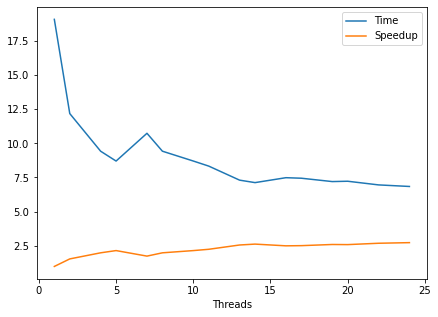

In [47]:
df[df["Type"] == "O"][["Type", "Threads", "Time", "Speedup"]].groupby('Type').plot(x="Threads", y=["Time", "Speedup"], figsize=(7, 5))

In [ ]:
!ls /usr/local/cuda/bin/nvprof*

/usr/local/cuda/bin/bin2c
/usr/local/cuda/bin/computeprof
/usr/local/cuda/bin/cudafe
/usr/local/cuda/bin/cudafe++
/usr/local/cuda/bin/cuda-gdb
/usr/local/cuda/bin/cuda-gdbserver
/usr/local/cuda/bin/cuda-install-samples-8.0.sh
/usr/local/cuda/bin/cuda-memcheck
/usr/local/cuda/bin/cuobjdump
/usr/local/cuda/bin/fatbinary
/usr/local/cuda/bin/g++
/usr/local/cuda/bin/gcc
/usr/local/cuda/bin/gpu-library-advisor
/usr/local/cuda/bin/nsight
/usr/local/cuda/bin/nvcc
/usr/local/cuda/bin/nvcc.profile
/usr/local/cuda/bin/nvdisasm
/usr/local/cuda/bin/nvlink
/usr/local/cuda/bin/nvprof
/usr/local/cuda/bin/nvprune
/usr/local/cuda/bin/nvvp
/usr/local/cuda/bin/ptxas

/usr/local/cuda/bin/crt:
link.stub  prelink.stub


In [ ]:
!./bin/pi

In [ ]:
!tail output2.csv

82,431,0.243425
82,458,0.244504
82,485,0.251062
82,512,0.23940840,120,0.425272
40,120,0.320597
40,120,0.359431
40,120,0.357095
40,120,0.358252
40,120,0.343038
40,120,0.389715


In [ ]:
!nvprof -V

nvprof: NVIDIA (R) Cuda command line profiler
Copyright (c) 2012 - 2016 NVIDIA Corporation
Release version 8.0.61 (21)


In [ ]:
%%shell

/usr/local/cuda-10.0/bin/./nvprof ./bin/pi

==4433== NVPROF is profiling process 4433, command: ./bin/pi
==4433== Profiling application: ./bin/pi
==4433== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  240.74ms         1  240.74ms  240.74ms  240.74ms  calcPi(float*, long, long)
                    0.00%  6.3040us         1  6.3040us  6.3040us  6.3040us  red(float*)
                    0.00%  2.2080us         1  2.2080us  2.2080us  2.2080us  [CUDA memset]
                    0.00%  1.6000us         1  1.6000us  1.6000us  1.6000us  [CUDA memcpy DtoH]
      API calls:   54.81%  240.77ms         1  240.77ms  240.77ms  240.77ms  cudaMemcpy
                   44.96%  197.53ms         1  197.53ms  197.53ms  197.53ms  cudaMalloc
                    0.09%  412.48us         1  412.48us  412.48us  412.48us  cuDeviceTotalMem
                    0.05%  198.37us         1  198.37us  198.37us  198.37us  cudaFree
                    0.03%  148.90us        90  1.6540